# 3D Fuzzy Clustering

Description

In [29]:
# Reload the notebook if an external file is updated
%load_ext autoreload
%autoreload 2

import sys

from pathlib import Path

path = str(Path.cwd().parent)
sys.path.append(path)

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import umap
import umap.plot

from constant import PICKLE
from datatype.spectrogram import flatten
from fcmeans import FCM
from IPython.display import Audio, display
from ipywidgets import (
    HBox, 
    HTML, 
    Image, 
    interactive, 
    Layout, 
    Output, 
    VBox
)
from plotly import graph_objs as go

In [31]:
file = Dataframe()
dataframe = file.load()

In [32]:
X = np.concatenate((
    [dataframe.x_3d],
    [dataframe.y_3d],
    [dataframe.z_3d],
))

X = X.transpose()

X.shape

(22345, 3)

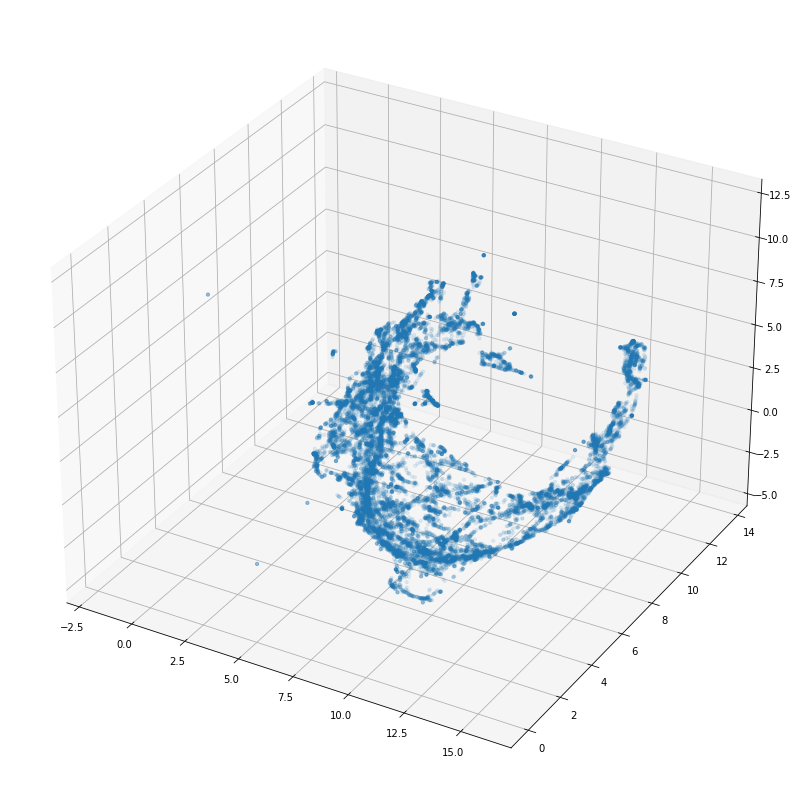

In [33]:
figsize = (32, 32)

fig = plt.figure(figsize=figsize)

ax = fig.add_subplot(
    2, 
    1, 
    2, 
    projection='3d'
)


ax.scatter(
    X[:, 0], 
    X[:, 1],
    X[:, 2],
    s=10,
    alpha=0.10
)

plt.show()
plt.close()

In [34]:
fcm = FCM(n_clusters=20)
fcm.fit(X)

In [35]:
centers = fcm.centers
labels = fcm.predict(X)

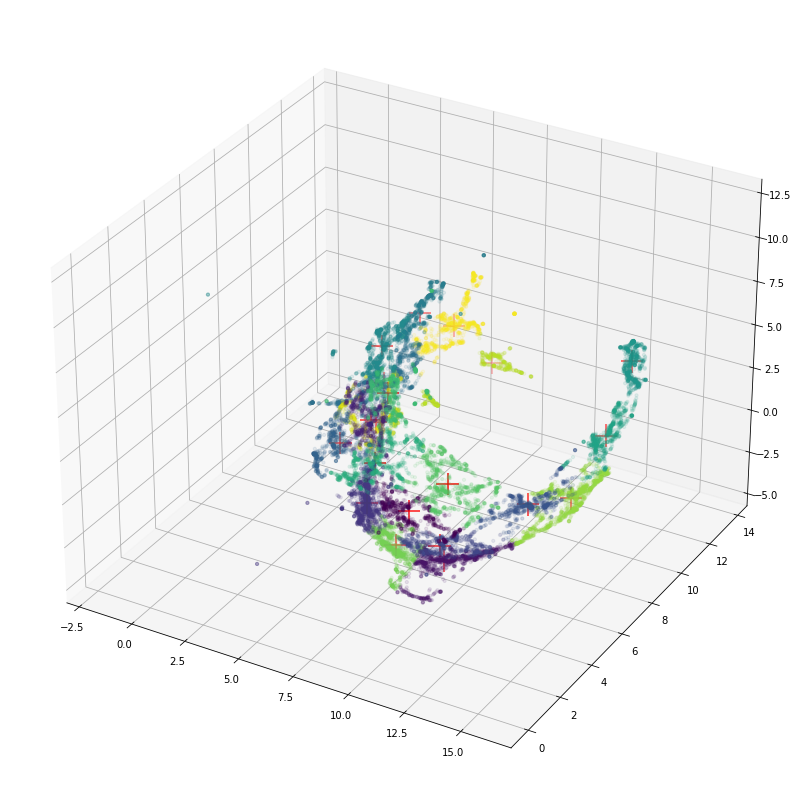

In [36]:
figsize = (32, 32)

fig = plt.figure(figsize=figsize)

ax0 = fig.add_subplot(
    2, 
    1, 
    2, 
    projection='3d'
)

ax1 = fig.add_subplot(
    2, 
    1, 
    2, 
    projection='3d'
)

ax0.scatter(
    X[:, 0], 
    X[:, 1],
    X[:, 2],
    s=10,
    alpha=0.10
)

ax1.scatter(
    X[:, 0], 
    X[:, 1],
    X[:, 2],
    c=labels,
    s=10,
    alpha=0.10
)

ax1.scatter(
    centers[:, 0], 
    centers[:, 1],
    centers[:, 2],
    marker='+',
    s=500,
    c='red'
)

plt.show()
plt.close()

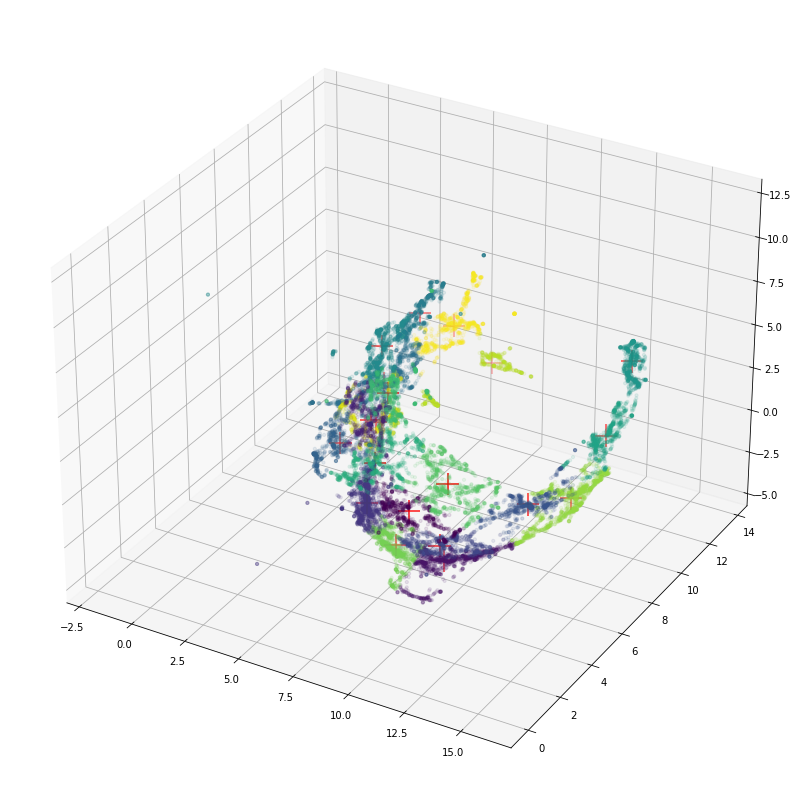

In [37]:
figsize = (32, 32)

fig = plt.figure(figsize=figsize)

ax = fig.add_subplot(
    2, 
    1, 
    2, 
    projection='3d'
)

ax.scatter(
    X[:, 0], 
    X[:, 1],
    X[:, 2],
    c=labels,
    s=10,
    alpha=0.10
)

ax.scatter(
    centers[:, 0], 
    centers[:, 1],
    centers[:, 2],
    marker='+',
    s=500,
    c='red'
)

plt.show()
plt.close()